In [1]:
import pandas as pd
from os import walk

In [2]:
datasets_names = []
path_df = '../datasets/original_files/'
for (dirpath, dirnames, filenames) in walk(path_df):
    datasets_names.extend(filenames)
    break
datasets_names

['boston-listings.csv.gz',
 'los_angeles-listings.csv.gz',
 'new_york_city-listings.csv.gz']

In [3]:
dataFrame = False
first = True
for name in datasets_names:
    if(first):
        first = False
        dataFrame = pd.read_csv(path_df+name, compression='gzip')
        dataFrame.set_index('id', drop=False, inplace=True)
        print('adding', len(dataFrame), 'rows')
        dataFrame ['file']=name
    else:
        _tmpDf = pd.read_csv(path_df+name, compression='gzip')
        _tmpDf.set_index('id', drop=False, inplace=True)
        _tmpDf['file']=name
        print('adding', len(_tmpDf), 'rows')
        dataFrame = pd.concat([dataFrame, _tmpDf])
        del _tmpDf
print('total rows:', len(dataFrame))


adding 3799 rows


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


adding 38481 rows


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


adding 50796 rows
total rows: 93076


In [4]:



df=dataFrame[[
 'name',
 'host_since',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'city',
 'state',
 'country',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'square_feet',
 'price',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'calendar_last_scraped',
 'number_of_reviews',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'reviews_per_month',
 'file']]

#cleaning columns
for x in df.columns:
    print(x)
    values = df[x][pd.notna(df[x])].values
    if(len(values) > 0):
        print(values[0])
    else:
        print('NOT_VALUES')
    print('')

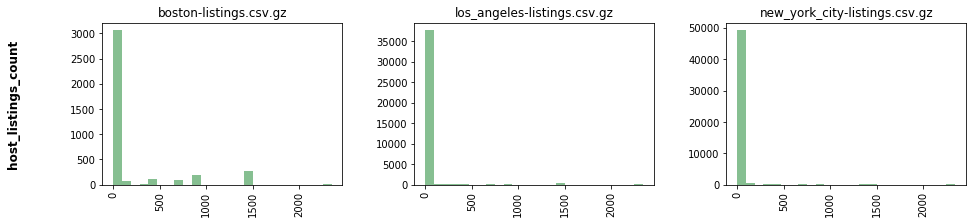

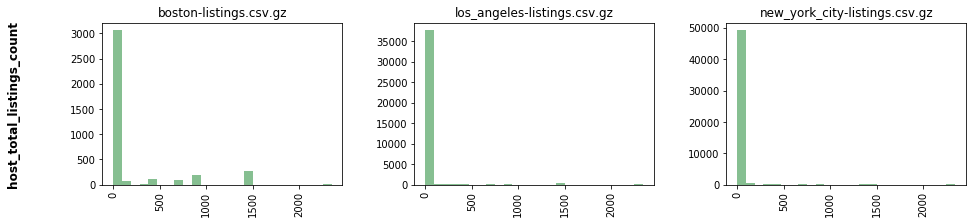

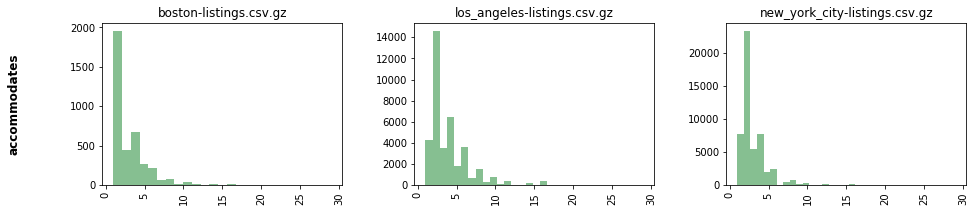

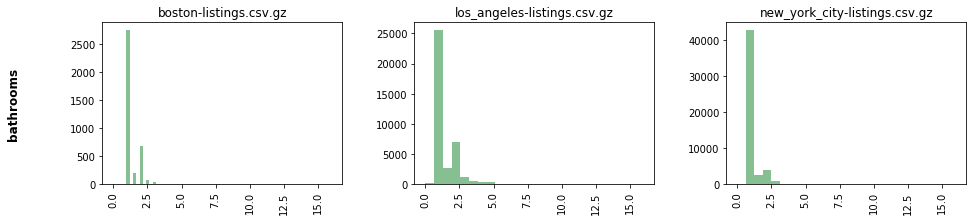

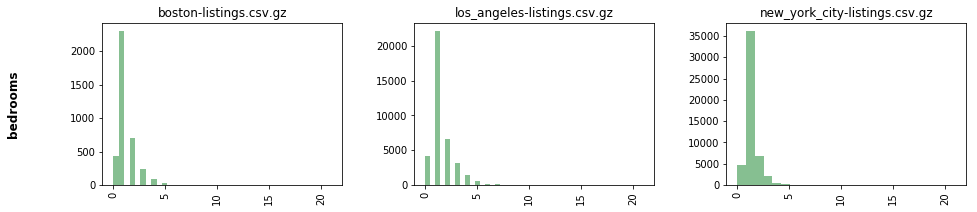

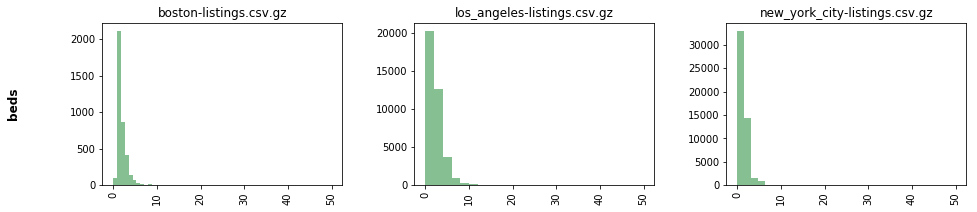

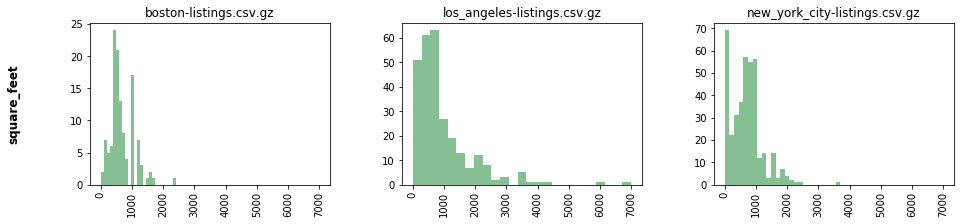

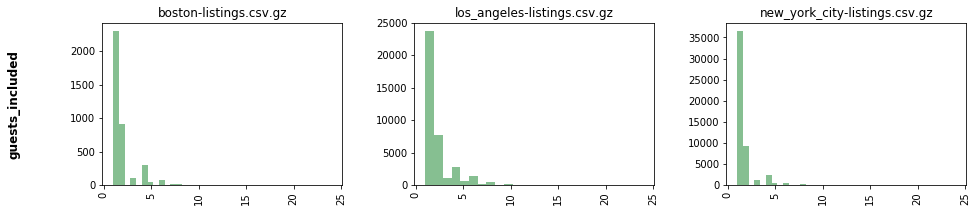

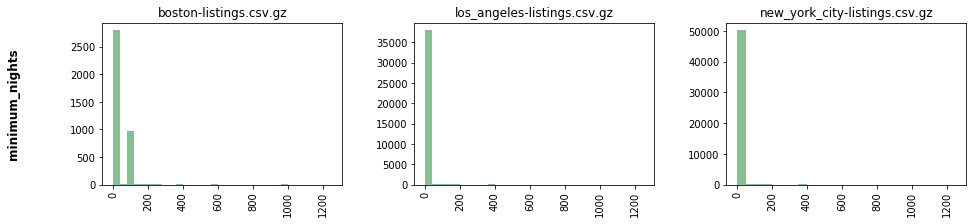

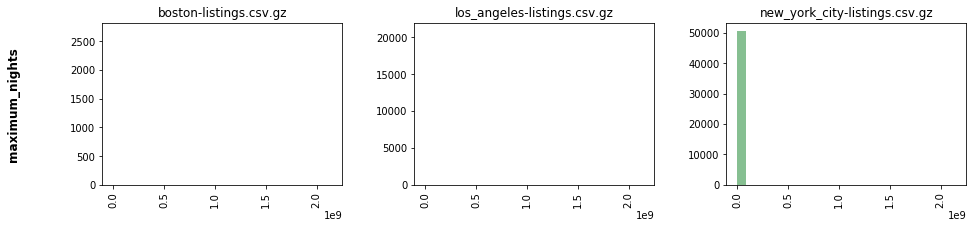

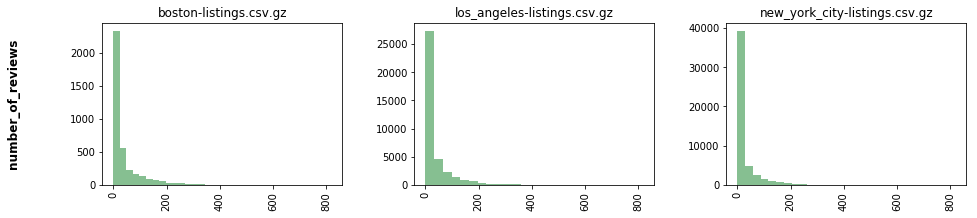

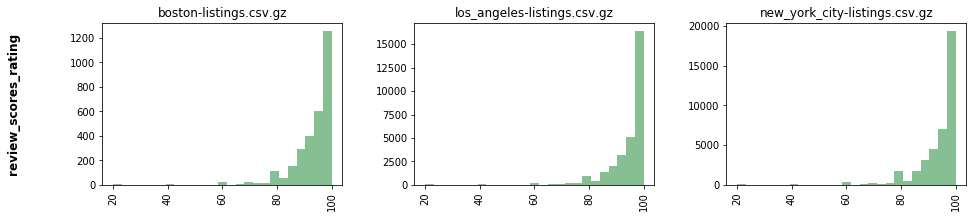

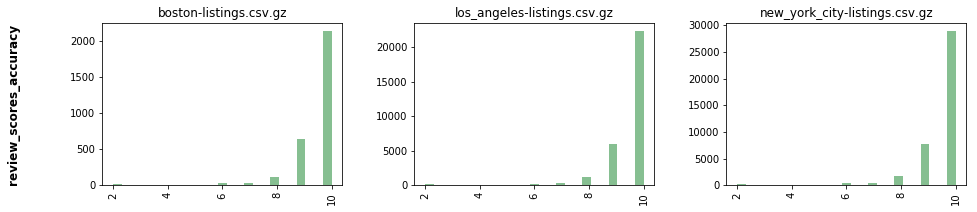

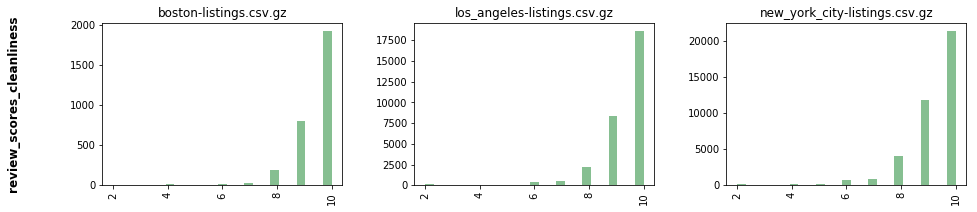

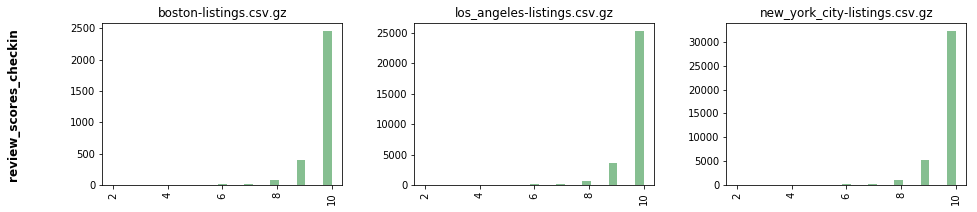

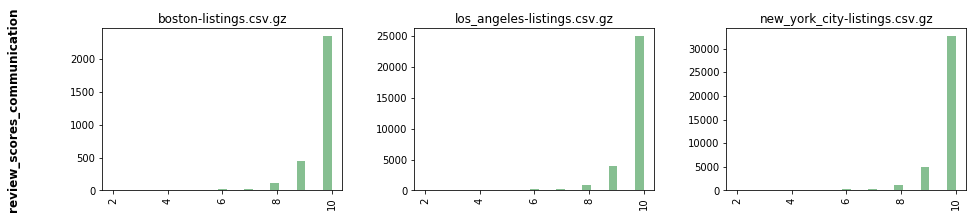

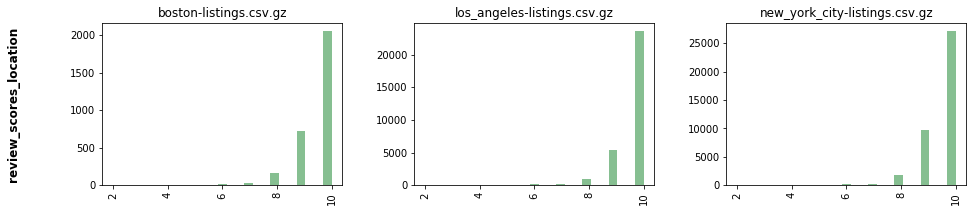

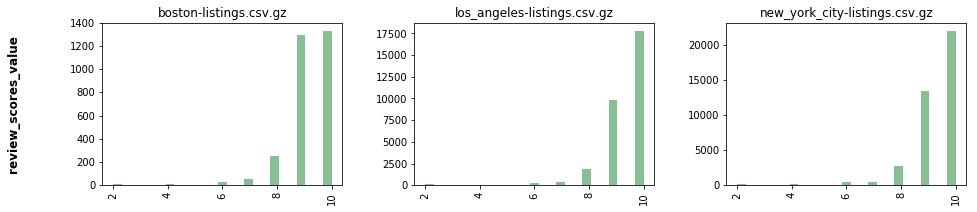

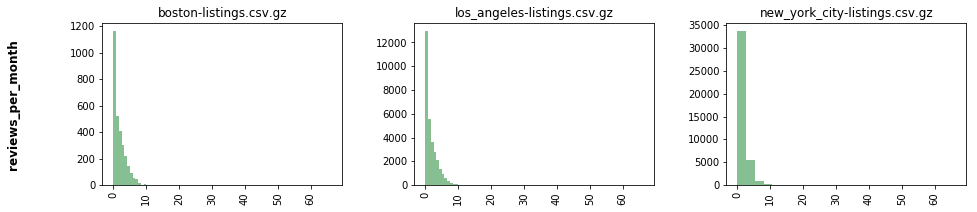

In [6]:
obj_columns=[]

for column in df.columns:
    if (df.dtypes[column]== 'O'):
        a=0
        #df[column].value_counts().plot(kind='barh') #horizontal bar plot
    else:
        h = df.hist(column=column, by='file' , bins=25,  figsize=(15,3), layout=(1,3), color='#86bf91',  sharex=True)
        for i,x in enumerate(h):
            # Set y-axis label
            if i == 0:
                x.set_ylabel(column, labelpad=50, weight='bold', size=12)
        



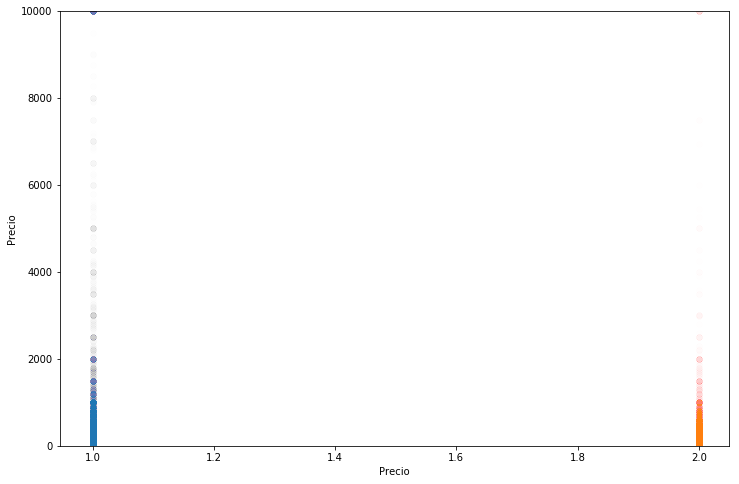

In [86]:
df = dataFrame

df = df[(pd.notna(df.price))]
df.loc[:,'price'] = df.price.apply(lambda x: x[1:-3].replace(',', '')).astype(int)
df_reviews = df[df.number_of_reviews>3]
weekly = df[pd.notna(df.weekly_price)]
monthly = df[pd.notna(df.monthly_price)]
weekly.loc[:,'weekly_price'] = weekly.weekly_price.apply(lambda x: x[1:-3].replace(',', '')).astype(int) / 7
monthly.loc[:,'monthly_price'] = monthly.monthly_price.apply(lambda x: x[1:-3].replace(',', '')).astype(int) / 30

# price
# weekly_price
# monthly_price

# len(dataFrame)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter([1 for i in range(len(df))], df.price, alpha=.005)
plt.scatter([2 for i in range(len(df_reviews))], df_reviews.price, alpha=.005)
# plt.scatter(weekly.price, weekly.weekly_price, alpha=.02)
# plt.scatter(monthly.price, monthly.monthly_price, alpha=.02)
plt.xlabel('Precio')
plt.ylabel('Precio')

lims = (0, 10000)
# plt.xlim(lims)
plt.ylim(lims)
plt.show()


In [48]:
for i in df.columns:
    print(i)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

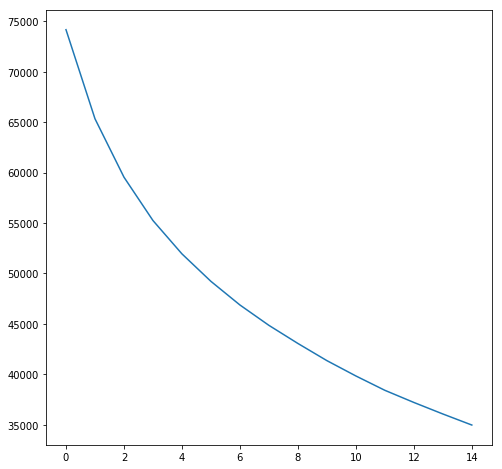

In [72]:
# df[(df.price>200) & (df.number_of_reviews>5)]
len(df[(df.number_of_reviews>3)])
# len(df)


num_of_r = []

maxVal = 15
for i in range(maxVal):
    num_of_r.append(len(df[(df.number_of_reviews>i)]))
    
    
plt.figure(figsize=(8,8))
plt.plot(range(maxVal), num_of_r)

# lims = (0, 600)
# plt.xlim(lims)
# plt.ylim(lims)
plt.show()

In [73]:
len(df[(df.number_of_reviews>5)])

49218